# Análisis de Canciones en Spotify

Objetivo: Estimar la probabilidad de que una nueva canción sea del agrado de un usuario, basado en su playlist actual.

Pregunta clave: ¿Qué características de las canciones en una playlist pueden predecir si un nuevo tema será del gusto del usuario?

Contexto: En este análisis, la variable objetivo (label) representa la preferencia del usuario por una canción, y será la variable de salida que deseamos predecir.

https://drive.google.com/file/d/1c1l3OMUFjQWcydV0srKe95LLEfkBMKia/view?usp=sharing

In [4]:
from collections import Counter
from IPython.display import Markdown, display
import pandas as pd
import requests

# Cargar el dataset
with requests.get(
    "https://drive.google.com/uc?export=download&id=1c1l3OMUFjQWcydV0srKe95LLEfkBMKia"
) as r, open("data_playlist.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

spotify_df = pd.read_csv("data_playlist.csv")

# Obtener el número de observaciones (filas) y variables (columnas)
num_observaciones = spotify_df.shape[0]
num_variables = spotify_df.shape[1]

# Contar el número de variables de cada tipo (ej: float64, int64)
tipos_de_datos = spotify_df.dtypes.value_counts()

# Crear la descripción del dataset
descripcion = f"""
#### Descripción del Dataset
El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** {num_observaciones}
- **Número de variables:** {num_variables}

Tipos de datos:
"""
for tipo, cantidad in tipos_de_datos.items():
    descripcion += f"- La mayoría de las variables son de tipo **{tipo}** ({cantidad} variables).\n"

# Mostrar el resultado como Markdown
display(Markdown(descripcion))


#### Descripción del Dataset
El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** 750
- **Número de variables:** 14

Tipos de datos:
- La mayoría de las variables son de tipo **float64** (9 variables).
- La mayoría de las variables son de tipo **int64** (5 variables).


## Inspeccionando un dataframe

In [5]:
# vemos los primeros 15 elementos o samples
spotify_df.head(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.7130,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.1920,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.3330,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.6010,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.8830,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.5240,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.5970,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.4520,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.7480,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.9130,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [6]:
# vemos los ultimos 15 elementos o samples
spotify_df.tail(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
735,0.019000,0.429,184753,0.760,0.000000,7,0.1020,-5.434,1,0.3270,78.260,4,0.541,0
736,0.001160,0.601,148125,0.990,0.520000,6,0.1240,-3.016,1,0.3370,127.958,4,0.192,0
737,0.905000,0.579,101148,0.221,0.000001,0,0.1020,-9.664,1,0.0478,118.871,3,0.221,1
738,0.379000,0.503,233560,0.618,0.000000,7,0.1140,-6.060,0,0.0299,81.907,4,0.232,1
739,0.102000,0.803,216575,0.631,0.000007,8,0.0858,-4.213,1,0.0444,104.999,4,0.659,0
740,0.202000,0.755,216450,0.577,0.000000,3,0.2340,-7.549,1,0.1570,100.034,4,0.451,0
741,0.162000,0.710,309173,0.784,0.000623,0,0.1940,-6.865,1,0.0416,126.656,4,0.901,1
742,0.195000,0.887,231733,0.682,0.050300,4,0.0623,-7.795,1,0.0436,115.700,4,0.962,1
743,0.125000,0.480,110075,0.560,0.000000,1,0.1360,-7.868,1,0.3510,204.162,4,0.571,1
744,0.124000,0.519,242227,0.495,0.006260,6,0.1830,-11.002,0,0.1010,95.078,4,0.262,1


In [7]:
# descripción de cada columna e información general del dataframe
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


## Análisis de las Variables

| Variable            | Tipo        | Descripción                                                                 |
|---------------------|-------------|-----------------------------------------------------------------------------|
| **acousticness**     | Continua    | Atributo que mide qué tan acústica es una canción.                          |
| **danceability**     | Continua    | Mide lo apta que es una canción para bailar.                                |
| **duration**         | Discreta    | Duración de una canción en milisegundos.                                    |
| **energy**           | Continua    | Mide la intensidad y actividad percibida de la canción.                     |
| **instrumentalness** | Continua    | Indica la probabilidad de que una pista no contenga voces.                  |
| **key**              | Discreta    | Representa la tonalidad musical de una canción (en semitonos).              |
| **liveness**         | Continua    | Detecta la presencia de una audiencia en la grabación.                      |
| **loudness**         | Continua    | Mide el volumen medio de la canción (en decibelios).                        |
| **mode**             | Binaria     | Indica si una pista está en modo mayor (1) o menor (0).                     |
| **speechiness**      | Continua    | Mide la cantidad de palabras habladas en la pista.                          |
| **tempo**            | Continua    | Mide el ritmo de la canción en beats por minuto (BPM).                      |
| **time_signature**   | Ordinal     | Representa la métrica de la canción (por ejemplo, 4/4).                     |
| **valence**          | Continua    | Mide el carácter musical de una pista en términos de positividad.           |
| **label**            | Binaria     | Variable objetivo que se desea predecir.                                    |

### Clasificación de Variables:

#### Numéricas:
- **Lista**:
  - `acousticness`, `danceability`, `duration`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`
  
- **Análisis**:
  - **Tipo**: Continuas y discretas.
  - **Distribución de los datos**: Utilizar histogramas, media, mediana, desviación estándar y percentiles.
  - **Conclusiones esperadas**:
    - Identificar distribuciones simétricas, sesgadas, o valores atípicos.

#### Categóricas:
- **Lista**:
  - `key`, `mode`, `time_signature`
  
- **Análisis**:
  - **Tipo**: Categóricas y ordinales.
  - **Cardinalidad**: Evaluar el número de categorías y su frecuencia.
  - **Representación**: Usar gráficos de barras o countplots para visualizar la distribución de categorías.
  - **Conclusiones esperadas**:
    - Determinar categorías raras o comunes y su impacto en el modelo.

### Gráficos sugeridos:

#### Variables Numéricas:
- Histogramas para observar la distribución.
- Boxplots para identificar valores atípicos.

#### Variables Categóricas:
- Gráficos de barras o countplots para visualizar la frecuencia de categorías.





In [8]:
label = spotify_df['label'] == 1
label.head()

0    True
1    True
2    True
3    True
4    True
Name: label, dtype: bool

In [9]:
spotify_df[label]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.7130,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.1920,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.3330,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.6010,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.8830,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.1250,0.480,110075,0.560,0.000000,1,0.1360,-7.868,1,0.3510,204.162,4,0.571,1
744,0.1240,0.519,242227,0.495,0.006260,6,0.1830,-11.002,0,0.1010,95.078,4,0.262,1
747,0.9160,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.1680,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


In [10]:
spotify_df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
spotify_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [13]:
# Matriz de Correlación entre Variables
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = spotify_data.corr()

# Crear el heatmap usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Añadir un título
plt.title('Matriz de Correlación entre Variables')

# Mostrar el gráfico
plt.show()

NameError: name 'spotify_data' is not defined

<Figure size 1000x800 with 0 Axes>

#### Interpretación de la Matriz de Correlación

El mapa de calor muestra las correlaciones entre las variables del dataset:

- **Energy** tiene una correlación positiva moderada con **loudness**, lo que sugiere que las canciones más energéticas tienden a ser más fuertes.
- **Danceability** y **valence** tienen una correlación positiva moderada, lo que indica que las canciones más "felices" también son más bailables.
- **Instrumentalness** tiene una correlación negativa con **danceability** y **energy**, lo que podría sugerir que las canciones instrumentales suelen ser menos bailables y menos energéticas.


NameError: name 'spotify_df' is not defined

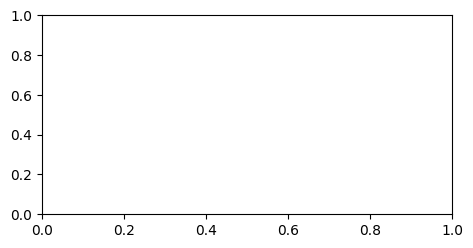

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables para graficar
variables = ['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'duration', 'instrumentalness', 'loudness', 
             'speechiness', 'liveness', 'key', 'mode', 'time_signature', 'label']

# Colores para cada gráfico
colores = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'orchid', 'gold', 'lightpink', 'lightseagreen', 
           'plum', 'deepskyblue', 'tan', 'yellowgreen', 'lightsteelblue', 'peachpuff']

# Crear un gráfico para cada variable con un color diferente
plt.figure(figsize=(18, 15))
for i, (variable, color) in enumerate(zip(variables, colores), 1):
    plt.subplot(5, 3, i)
    sns.histplot(spotify_df[variable], bins=20, kde=True, color=color)
    plt.title(f'Distribución de {variable}', fontsize=13)
plt.tight_layout()
plt.show()

#### Descripción de la distribucion de las variables:

- **Acousticness**: La mayoría de las canciones tienen valores bajos de acústica, aunque también hay una cantidad significativa de canciones con valores más altos.
- **Danceability**: La distribución muestra que muchas canciones tienen una alta bailabilidad, con un pico entre 0.5 y 0.7.
- **Energy**: La energía de las canciones tiende a concentrarse en valores medios a altos.
- **Valence**: La positividad de las canciones está distribuida de manera uniforme, pero con un ligero aumento hacia valores más bajos.
- **Tempo**: La mayoría de las canciones están en el rango de 90-150 BPM.
- **Duration**: La duración de las canciones varía, pero la mayoría está en un rango de 150,000 a 250,000 milisegundos (aproximadamente 2.5 a 4 minutos).
- **Instrumentalness**: La mayoría de las canciones son no instrumentales, con valores cercanos a cero.
- **Loudness**: Los niveles de volumen varían, pero las canciones suelen tener un rango típico de volumen moderado.
- **Speechiness**: La mayoría de las canciones tienen poca o ninguna cantidad de palabras habladas.
- **Liveness**: La mayoría de las canciones tienen poca o ninguna presencia de público en la grabación.
- **Key**: La variable key representa la nota principal de la canción y está distribuida uniformemente entre varios valores.
- **Mode**: La mayoría de las canciones están en modo mayor, representado por un valor de 1.
- **Time Signature**: La mayoría de las canciones tienen un compás de 4 tiempos.
- **Label**: Esta es una variable categórica que clasifica las canciones en distintos grupos.
